# FAIRshake WormBase Datasets Evaluation Summary

In [1]:
import sys
print("Python Version Info:")
print("Created by Brian Schilder, 07/22/2018\n")
print("Modified by Megan Wojciechowicz, 07/23/2018\n")
print(sys.version)


Python Version Info:
Created by Brian Schilder, 07/22/2018

Modified by Megan Wojciechowicz, 07/23/2018

3.6.3 |Anaconda, Inc.| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## Summary Questions
- Average score for each question
- Standard deviation for each answer
- Correlation between questions
- Evals per person, max evals, and distribution
- Are some people generally harsher
- Which answers tended to have comments
- FAIRest tools vs. Least FAIR tools

## FAIRshake Questions
1. ID/ACCESSION : A standardized ID or accession number is used to identify the dataset.
2. METADATA : The dataset is described with metadata using a formal, broadly applicable vocabulary. 
3. EXPERIMENT : Information is provided on the experimental methods used to generate the data. 
4. REPOSITORY : The dataset is hosted in an established data repository, if a relevant repository exists. 
5. DOWNLOAD : The dataset can be downloaded for free from the repository. 
6. VERSIONING : Version information is provided for the dataset.
7. CONTACT: Contact information is provided for the creator(s) of the dataset. 
8. CITATION : Information is provided describing how to cite the dataset. 
9. LICENSE : Licensing information is provided on the dataset’s landing page. 


In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import numpy as np


import pandas as pd
fair = pd.read_excel("WormBase_fair_scores.xlsx")

# Only select rows that had a q_id's 1-9 
fair = fair[fair['q_id'] >9]
fair = fair[fair['q_id'] <19]
fair['q_id'] = pd.Categorical(fair['q_id'])
qDict = {10:'1. ID/Accession', 11:'2. Metadata', 12:'3. Experiment', 13:'4. Repository', 
         14:'5. Download', 15:'6. Versioning', 16:'7. Contact', 17:'8. Citation', 18:'9. License'}
fair["q_name"] = fair['q_id'].map(qDict)
print("+++++++++++++++++")
print(str(int(len(fair)/9)) + " evaluations total.")
print(str(len(np.unique(fair["name"])))+" resources total.")

+++++++++++++++++
9 evaluations total.
9 resources total.


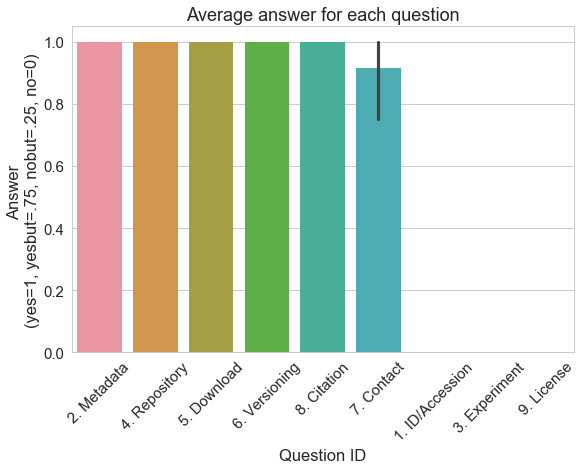

In [3]:
import seaborn as sn
sn.set(font_scale=1.5)
import matplotlib.pyplot as plt
sn.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(9, 6)) 

fair["answer01"] = fair.answer.map(dict(yes=1, no=0, yesbut=.75, nobut=.25))
avg_per_q = fair.groupby('q_name')['q_name','answer01'].mean()
std_per_q = fair.groupby('q_name')['q_name','answer01'].std()
avg_per_q.rename(columns={'answer01':'answer01_mean'}, inplace=True)
avg_per_q = avg_per_q.sort_values(by='answer01_mean', ascending=False)

## plot
g = sn.barplot(data=fair, x='q_name', y='answer01', order=avg_per_q.index)
g.set(ylabel='Answer \n(yes=1, yesbut=.75, nobut=.25, no=0)', xlabel='Question ID', title="Average answer for each question")
plt.xticks(rotation=45, ha='center')
#plt.savefig("WormBase_datasets_avg_answer.png",dpi=300,bbox_inches='tight')
plt.show()

## Average score for each question

## Frequency of each of the 4 score options for each question

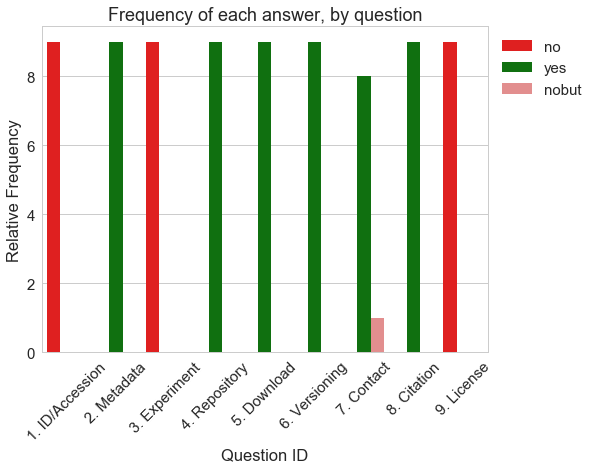

In [4]:
fig, ax = plt.subplots(figsize=(8, 6)) #default figsize = (8,6)

scores4 = fair.groupby(['q_name','answer'])['answer'].count()
scores4.name = 'answerCount'
scores4 = scores4.reset_index()
palette ={"no":"red","nobut":"lightcoral", "yes":"green", "yesbut":"limegreen"}
g = sn.barplot(data=scores4, x='q_name', y='answerCount', hue='answer', palette=palette)
g.set(ylabel='Relative Frequency', xlabel='Question ID', title="Frequency of each answer, by question")
g.legend()
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='center')
#plt.savefig("WormBase_datasets_answer_breakdown.png",dpi=300,bbox_inches='tight')
plt.show()

## Which answers tended to have the most comments

Questions 6. Versioning and 2. Metadata and 1. ID/Accession most frequently had comments.


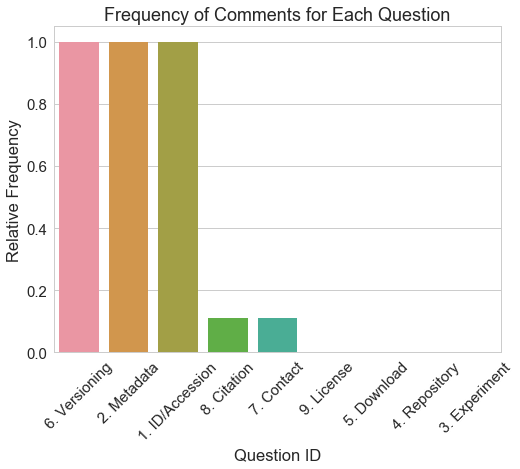

In [5]:
fig, ax = plt.subplots(figsize=(8, 6)) #default figsize = (8,6)

commentDict={}
for q in fair['q_name'].unique():
    sub = fair.loc[fair['q_name']==q]['comment']
    notEmpty = sum(~sub.isnull())/len(sub.isnull())
    commentDict[q] = notEmpty
commentDF = pd.Series(commentDict).sort_values(ascending=False)

g = sn.barplot(x=commentDF.index, y=commentDF )
g.set(xlabel='Question ID', ylabel='Relative Frequency', 
       title="Frequency of Comments for Each Question")
plt.xticks(rotation=45, ha='center')
print("Questions "+commentDF.index[0]+" and "+commentDF.index[1]+ " and "+commentDF.index[2]+" most frequently had comments.")
plt.show()

## The FAIRest of them all

In [5]:
resourceScores = fair.groupby('name')['answer01'].mean().sort_values(ascending=False).reset_index()
FAIRest = resourceScores.loc[resourceScores['answer01']==max(resourceScores['answer01']),:]

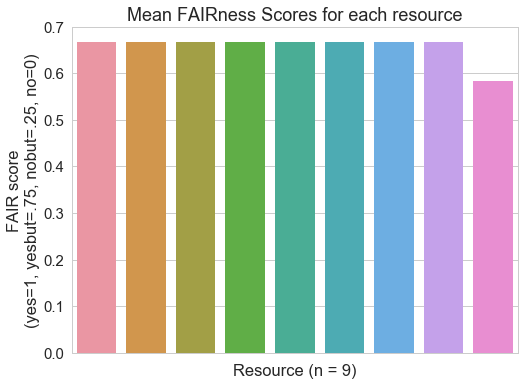

FAIRest resources (score = 0.666666666667)
                                    name  answer01
0     WormBase: Data (WormBase Releases)  0.666667
1           WormBase: Data (Transcripts)  0.666667
2              WormBase: Data (Software)  0.666667
3               WormBase: Data (Protein)  0.666667
4  WormBase: Data (Non-species Specific)  0.666667
5                  WormBase: Data (GFF3)  0.666667
6          WormBase: Data (Core Genomes)  0.666667
7           WormBase: Data (Annotations)  0.666667


Least FAIR resources ( score = 0.583333333333)
                                      name  answer01
8  WormBase: Data (Supplementary Datasets)  0.583333


In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6)) #default figsize = (8,6)

resourceScores = fair.groupby('name')['answer01'].mean().sort_values(ascending=False).reset_index()
FAIRest = resourceScores.loc[resourceScores['answer01']==max(resourceScores['answer01']),:]
leastFAIR  = resourceScores.loc[resourceScores['answer01']< max(resourceScores['answer01']),:]

g = sn.barplot(data=resourceScores, x='name', y='answer01')
g.set(xlabel='Resource (n = '+str(len(resourceScores))+')', ylabel='FAIR score\n(yes=1, yesbut=.75, nobut=.25, no=0)', 
       title="Mean FAIRness Scores for each resource")
g.set(xticklabels=[])
#plt.savefig("WormBase_datasets_mean_fairness.png",dpi=300,bbox_inches='tight')
plt.show()
print("FAIRest resources (score = "+ str(max(resourceScores['answer01'])) +")")
print(FAIRest)
print("\n")
print("Least FAIR resources ( score = "+ str(min(resourceScores['answer01'])) +")")
print(leastFAIR)

## Histogram of FAIR scores across resources

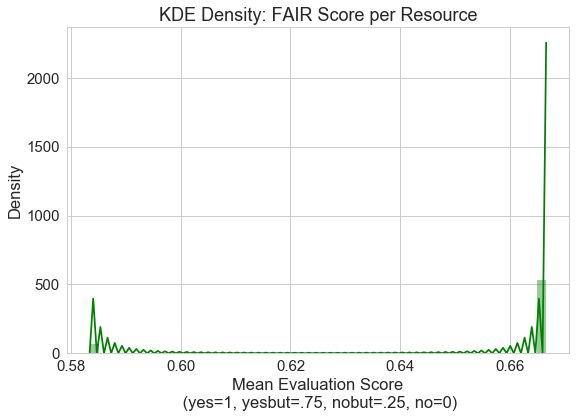

In [7]:
fig,ax = plt.subplots(figsize =(9,6))

g=sn.distplot(resourceScores['answer01'],bins=50,color='green',norm_hist=False)
g.set(xlabel="Mean Evaluation Score\n (yes=1, yesbut=.75, nobut=.25, no=0)", ylabel='Density', title='KDE Density: FAIR Score per Resource')
#plt.savefig("WormBase_datasets_overall_fairness.png",dpi=300,bbox_inches='tight')
plt.show()